In [20]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings ("ignore")


The dataset contains 21 variables and 1000 observatios. 8 variables are of numeric type and 13 of object type. As the object type variables do not have any null values, we can conclude that they are of categorical type.

In [ ]:
german_df = pd.read_csv('german.data', delimiter=' ',header=None)

german_df.columns=['account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'intallment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon',
                   'foreign','target']

german_df = german_df.replace(['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],
                  ['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled',
                   'none','car','life_insurance','real_estate'])


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#plt.figure()
#german_df.hist()
#plt.show()

In [15]:
# This means there are no missing values present as result = FALSE

german_df.isna().any().any()

False

The target column has two values:

1: representing a good loan
2: representing a bad (defaulted) loan.

The usual convention is to use '1' for bad loans and '0' for good loans. Let's replace the values to comply to the convention.

In [23]:
german_df.target.unique()

le= LabelEncoder()
le.fit(german_df.target)
german_df.target=le.transform(german_df.target)
german_df.target.head(5)

0    0
1    1
2    0
3    0
4    1
Name: target, dtype: int64

In [18]:
german_df[['credit_amount','duration','age']].describe()
german_df['credit_amount']=np.log(german_df['credit_amount'])
german_df[['credit_amount','duration','age']].describe()

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,7.788691,20.903000,35.546000
std,0.776474,12.058814,11.375469
min,5.521461,4.000000,19.000000
25%,7.219276,12.000000,27.000000
50%,7.749107,18.000000,33.000000
75%,8.287088,24.000000,42.000000
max,9.821409,72.000000,75.000000


A glance of the distribution of the continues variables shows that the variables are in different range.

The histogram suggests that majority of the observations falls in the first quantile of the variable. This can be verified by box-plot.

The box plots show that most of the credits amounts are between 1000 to 4500 dollars. The credit amount is positively skewed. Most of the loan duration is from 15 to 30 months. Majority of the loan applicants have age between 28 - 43.

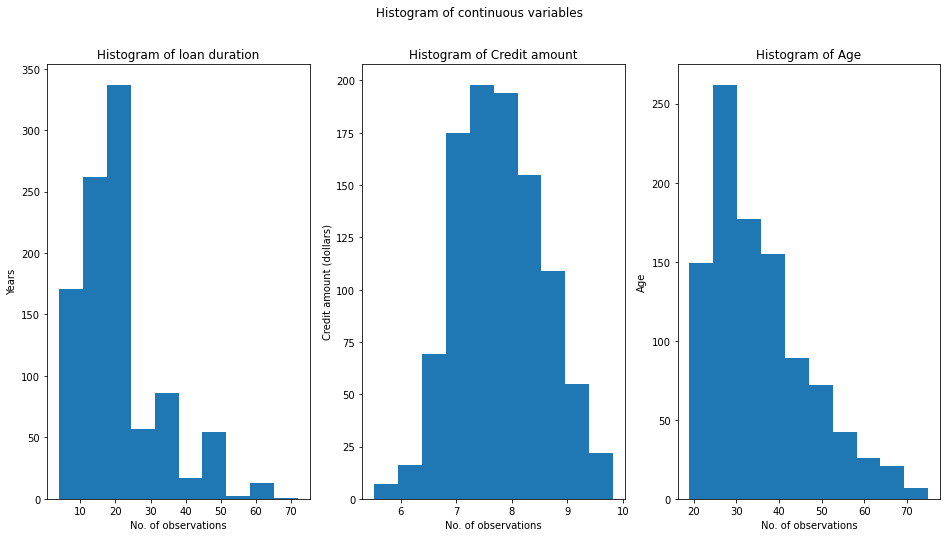

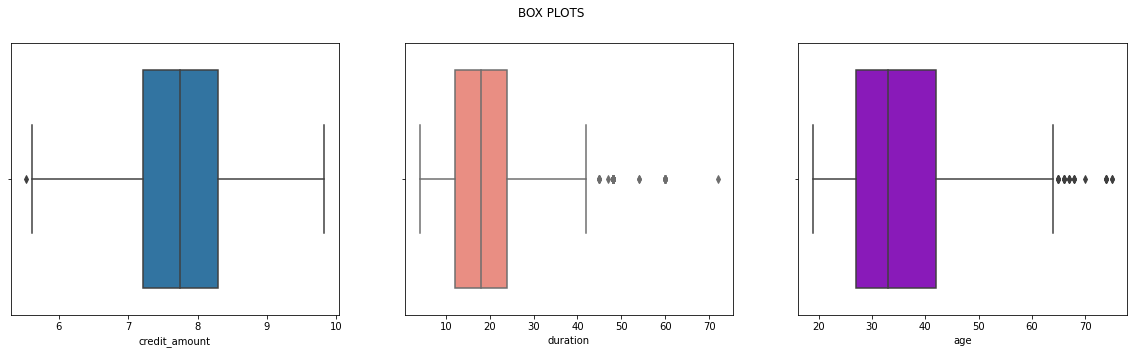

In [21]:
fig, axes = plt.subplots(1,3, figsize=(16,8))
plt.suptitle('Histogram of continuous variables')
axes[0].hist(german_df['duration'])
axes[0].set_xlabel('No. of observations')
axes[0].set_ylabel('Years')
axes[0].set_title('Histogram of loan duration');

axes[1].hist(german_df['credit_amount'])
axes[1].set_xlabel('No. of observations')
axes[1].set_ylabel('Credit amount (dollars)')
axes[1].set_title('Histogram of Credit amount');

axes[2].hist(german_df['age'])
axes[2].set_xlabel('No. of observations')
axes[2].set_ylabel('Age')
axes[2].set_title('Histogram of Age');

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(german_df['credit_amount'], ax=ax[0]);
sns.boxplot(german_df['duration'], ax=ax[1], color='salmon');
sns.boxplot(german_df['age'], ax=ax[2], color='darkviolet');

Relationship between the credit amount and repayment duration

Scatter Plot

The scatter plot shows that in general, larger loans have longer duration of repayment. Cases where large loans are given with short repayment period have turned out to be bad loans.

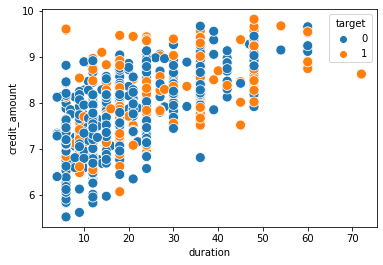

In [24]:
sns.scatterplot(y=german_df.credit_amount, 
                x=german_df.duration, 
                hue=german_df.target, 
                s=100, 
);

Relationship between credit amount and duration of the loan

Line graph


There is a linear relationship between the credit amount and duration. The larger the credit amount, the longer is the repayment duration.

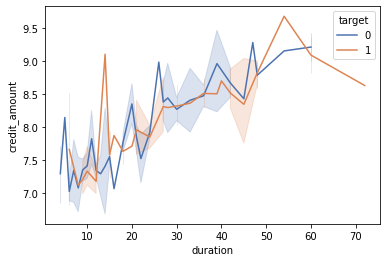

In [31]:
sns.lineplot(data=german_df, x='duration', y='credit_amount', hue='target', palette='deep');

Relationship between the most valuable asset of the candidate and the credit amount, credit risk

The graphs show that people with real estate assets are very risky.

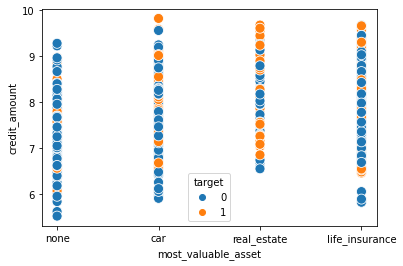

In [26]:
sns.scatterplot(y=german_df.credit_amount, 
                x=german_df.most_valuable_asset, 
                hue=german_df.target, 
                s=100, 
                );

In [ ]:
We have categorical variables with 2 to 10 categories. We go for Label encoding for variables with only two categories where as for variables with more than two categories, we go for one-hot encoding. In label encoding, we assign each unique category in a categorical variable with an integer. 

In [32]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in german_df:
    if german_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(german_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(german_df[col])
            # Transform both training and testing data
            german_df[col] = le.transform(german_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables
german_df = pd.get_dummies(german_df)

print('Encoded Features shape: ', german_df.shape)

2 columns were label encoded.
Encoded Features shape:  (1000, 58)


Positive correlation:

1) People with checking accounts with a negative balance (account_bal_A11) are likely to default the loan.

2) Longer duration loans (duration) tends to be defaulted.


Negative correlation:

1) People with no checking account (account_bal_A14) are likely to repay the loan.

In [34]:
# Extract the significantly correlated variables
corr_data = german_df[['target', 'account_bal_neg_bal','duration','account_bal_no_acc']]
corr_data_corrs = corr_data.corr()

print(corr_data_corrs)

                       target  account_bal_neg_bal  duration  \
target               1.000000             0.258333  0.214927   
account_bal_neg_bal  0.258333             1.000000  0.022244   
duration             0.214927             0.022244  1.000000   
account_bal_no_acc  -0.322436            -0.495358 -0.063467   

                     account_bal_no_acc  
target                        -0.322436  
account_bal_neg_bal           -0.495358  
duration                      -0.063467  
account_bal_no_acc             1.000000  


It is easy to get from the preliminary analysis of the above data that the data information is complete without any missing values and outliers.From the results of the data analysis, we get the following interesting information:
•
1) Of all the applicants, nearly 40% have no checking accounts and 30% have a balance of less than zero.

2) Most loans are for cars, furniture, and TV/Radio.

3) The credit margin is mainly distributed in 0-5000.

4) People who are already employed are more likely to take out loans.

5) The age of the borrowers mainly ranges from 20 to 50, among which the middle-aged are the main group.

6) Credit amount and Duration of Credit have a high linear correlation.

7) And, Credit amount is positively skewed,

Divide the data randomly into training (60%) and validation (40%) partitions, and develop classification
models using the following data mining techniques:

• Logistic regression
• Classification trees
• Neural networks
• Discriminant Analysis.

In [63]:
#Test and Train split

from sklearn.model_selection import train_test_split
x, y = german_df.drop('target', axis=1), german_df['target']
x.shape, y.shape

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.60, random_state=42)

x_train.shape, x_test.shape

((400, 57), (600, 57))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       415
           1       0.00      0.00      0.00       185

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



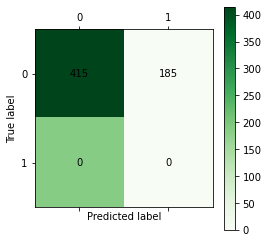

In [92]:
#Logistic Regression

tuned_models_test=[]
tuned_models_train=[]

# Create the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, random_state=42)

# Train on the training data
log_reg.fit(x_train, y_train)

# Evaluate on test dataset
recall_test= recall_score(y_test,log_reg.predict(x_test))
roc_test=roc_auc_score(y_test,log_reg.predict_proba(x_test)[:, 1])
# print('LR',' recall_test:', round(recall_test,2),' auc_roc_test:', round(roc_test,2))
# tuned_models_test.append(('LR',' recall_test:', round(recall_test,2),' auc_roc_test:', round(roc_test,2)))

# Evaluate on train dataset
roc_train= cross_val_score(log_reg, x_train, y_train, cv=skf, scoring='roc_auc').mean()
recall_train= cross_val_score(log_reg, x_train, y_train, cv=skf, scoring='recall').mean()
# print('LR',' recall_train:', round(recall_train,2),' auc_roc_train:', round(roc_train,2))
# tuned_models_train.append(('LR',' recall_train:', round(recall_train,2),' auc_roc_train:', round(roc_train,2)))
print(classification_report(y_test, log_reg.predict(x_test)))

y_pred = log_reg.predict(x_test)

from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred) 
plt.matshow (confusion_matrix, cmap=plt.cm.Greens)

plt.colorbar ()

for i in range (len (confusion_matrix)):
    for j in range(len(confusion_matrix)): 
        plt.annotate(confusion_matrix[i,j], xy=(i, j), horizontalalignment='center', verticalalignment='center') 

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()


Accuracy: 66.16666666666666 %


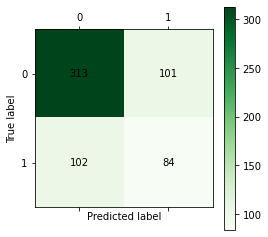

In [89]:
#Classification Tree

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred) 
plt.matshow (confusion_matrix, cmap=plt.cm.Greens)

plt.colorbar ()

for i in range (len (confusion_matrix)):
    for j in range(len(confusion_matrix)): 
        plt.annotate(confusion_matrix[i,j], xy=(i, j), horizontalalignment='center', verticalalignment='center') 

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [79]:
#Neural Networks


# organize imports
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

# seed for reproducing same results
seed = 9
np.random.seed(seed)

# split into input and output variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create the model
model = Sequential()
model.add(Dense(8, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=200, batch_size=5, verbose=0)

# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

NameError: name 'dataset' is not defined

In [94]:
#Discriminant Analysis

# create model with default parameters- baseline
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train it on the training set
cv_result_baseline= cross_val_score(rf_baseline, x_test, y_test, cv=skf)

# Evalute the results (cross-val)
print("CV accuracy score: {:.2f}%".format(cv_result_baseline.mean() * 100))

x = RandomForestClassifier.predict(x_test)

from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred) 
plt.matshow (confusion_matrix, cmap=plt.cm.Greens)

plt.colorbar ()

for i in range (len (confusion_matrix)):
    for j in range(len(confusion_matrix)): 
        plt.annotate(confusion_matrix[i,j], xy=(i, j), horizontalalignment='center', verticalalignment='center') 

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

CV accuracy score: 73.83%


TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
It can be seen that the Discriminant Analysis model
outperformed in terms of accuracy.